# # Coronavirus 2020 - effectiveness of measures taken - Spain

In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
# Alternative plotting backend for interative data exploration
# %matplotlib notebook

from coronavirus import overview, spain_get_region, fetch_data_spain, plot_logdiff_time

# If you want to edit the source in the notebook, try "%load coronavirus.py" 
# and comment out the import statement above.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
spanish_regions = ["Andalucía", "Aragón", "Asturias", "Cantabria", "Ceuta", "Castilla y León",
                   "Castilla-La Mancha", "Canarias", "Cataluña", "Extremadura", "Galicia",
                   "Islas Baleares", "Murcia", "Com. Madrid", "Melilla", "Navarra", "País Vasco",
                   "La Rioja", "Com. Valenciana"]

# Andalucía

In [8]:
cases_and, deaths_and = spain_get_region(region="Andalucía")

Please be patient - downloading data from https://covid19.isciii.es/resources/serie_historica_acumulados.csv ...
Completed downloading 988 rows in 0.3 seconds.


In [14]:
cases_and.index[-1]

Timestamp('2020-04-10 00:00:00')

In [4]:
def get_compare_data(countrynames, rolling=7, regions=False):
    """Given a list of country names, return two dataframes: one with cases and one with deaths
    where
    - each column is one country
    - data in the column is the diff of accumulated numbers
    - any zero values are removed for italy (data error)
    - apply some smoothing
    """
    df_c = pd.DataFrame()
    df_d = pd.DataFrame()
    
    if regions:
        for region in spanish_regions:
            c, d = spain_get_region(region)

            df_c[region] = c.diff().rolling(rolling, center=True).mean()  # cases
            df_d[region] = d.diff().rolling(rolling, center=True).mean()  # deaths
    
    else:

        for countryname in countrynames:
            c, d = get_country(countryname)

            df_c[countryname] = c.diff().rolling(rolling, center=True).mean()  # cases
            df_d[countryname] = d.diff().rolling(rolling, center=True).mean()  # deaths

    return df_c, df_d

In [5]:
def make_compare_plot_spain(region,
                              compare_with=[], #"China", "Italy", "Germany"],
                              compare_with_local=spanish_regions,
                              v0c=10, v0d=1):
    rolling = 7
#    region, subregion = unpack_region_subregion(region_subregion)
#    df_c1, df_d1 = get_compare_data_germany((region, subregion), compare_with_local, rolling=rolling)
    df_c, df_d = get_compare_data(compare_with_local, rolling=rolling, regions=True)

    # need to get index into same timezone before merging
#    df_d.set_index(df_d.index.tz_localize(None), inplace=True)
#    df_c.set_index(df_c.index.tz_localize(None), inplace=True)

#    df_c = pd.merge(df_c1, df_c2, how='outer', left_index=True, right_index=True)
#    df_d = pd.merge(df_d1, df_d2, how='outer', left_index=True, right_index=True)

    res_c = df_c#align_sets_at(v0c, df_c)
    res_d = df_d#align_sets_at(v0d, df_d)
    
#    return res_c, res_d

    
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    ax=axes[0]
    plot_logdiff_time(ax, res_c, f"days since {v0c} cases",
                      "daily new cases\n(rolling 7-day mean)",
                      v0=v0c, highlight={res_c.columns[0]:"C1"}, labeloffset=0.5)
    ax = axes[1]

    res_d_0 = res_d[res_d.index >= 0]   # from "day 0" only
    # if we have values in between 0.1 and 1, set the lower `y_limit` on the graph to 0.1
    if res_d_0[(res_d_0 > 0.1) & (res_d_0 < 1)].any().any():    # there must be a more elegant check
        y_limit = 0.1
    else:
        y_limit = v0d
    plot_logdiff_time(ax, res_d, f"days since {v0d} deaths",
                      "daily new deaths\n(rolling 7-day mean)",
                      v0=y_limit, highlight={res_d.columns[0]:"C0"},
                      labeloffset=0.5)

    # fig.tight_layout(pad=1)

    title = f"Daily cases (top) and deaths (below) for Spain: {region}"
    axes[0].set_title(title)

    return axes, res_c, res_d

Please be patient - downloading data from https://covid19.isciii.es/resources/serie_historica_acumulados.csv ...
Completed downloading 988 rows in 0.4 seconds.
Please be patient - downloading data from https://covid19.isciii.es/resources/serie_historica_acumulados.csv ...
Completed downloading 988 rows in 0.3 seconds.
Please be patient - downloading data from https://covid19.isciii.es/resources/serie_historica_acumulados.csv ...
Completed downloading 988 rows in 0.3 seconds.
Please be patient - downloading data from https://covid19.isciii.es/resources/serie_historica_acumulados.csv ...
Completed downloading 988 rows in 0.3 seconds.
Please be patient - downloading data from https://covid19.isciii.es/resources/serie_historica_acumulados.csv ...
Completed downloading 988 rows in 0.3 seconds.
Please be patient - downloading data from https://covid19.isciii.es/resources/serie_historica_acumulados.csv ...
Completed downloading 988 rows in 0.3 seconds.
Please be patient - downloading data fro

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


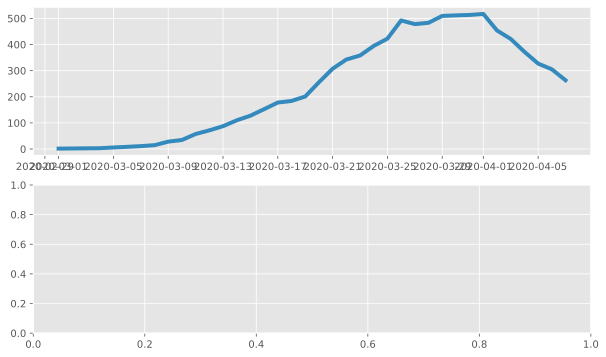

In [6]:
axes, c, d = make_compare_plot_spain("Andalucía")

In [7]:
c ## df with all regions as columns

NameError: name 'c' is not defined

# La Rioja

In [ ]:
cases_rio, deaths_rio = spain_get_region(region="La Rioja")

# Comunidad de Madrid

In [ ]:
cases, deaths = spain_get_region(region="Com. Madrid")

# Cataluña

In [ ]:
cases, deaths = spain_get_region(region="Cataluña")

# País Vasco

In [ ]:
cases, deaths = spain_get_region(region="País Vasco")

# Canarias

In [ ]:
cases, deaths = spain_get_region(region="Canarias")